**Christou Nektarios - Image Processing 2022-2023 NKUA**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Thresholding

The following plot depicts a threshold transformation function, which is a discontinuous piecewise function characterized by a step-like shape. The function assigns output intensity values based on whether the input intensity values are below or above a threshold value:
<br>
<center>
Foreground Value, if Pixel Value > Threshold <br>
Background Value, if Pixel Value <= Threshold
</center>
<br>

It's evident that the function reduces the number of distinct intensity values in an image by mapping similar values to the same value. In this case, the transformation is mapping a wide range of intensities to a smaller set of distinct values (intensity quantization). This transformation can result in loss of detail and information in the image, as many similar intensity values are mapped to the same value.


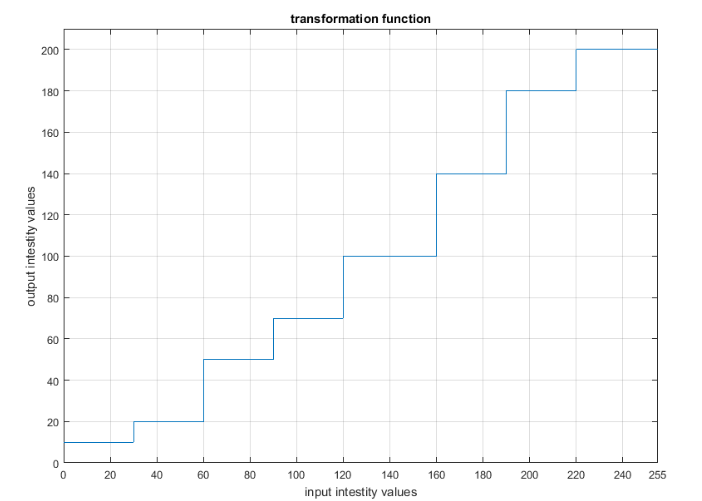

In [2]:
def threshold(img, mapping):
    """
    Applies a threshold transformation function on a given image for the given
    range of thresholds. The implementation is vectorized with numpy in order
    to be more efficient.

    Parameters:
        img:        numpy array of the input image.
        mapping:    key/value pairs with range of thresholds and corresponding
                    new intensities.

    Returns:
        A numpy array of same dimensions with the input image with the transformed
        intensities.
    """

    # Check if the input image is not grayscale
    if img.ndim == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Initiliaze output image with zeros
    output_img = np.zeros_like(img)

    # Apply thresholding
    for threshold_rng, new_intensity in mapping.items():
        start, end = threshold_rng
        output_img[(img >= start) & (img < end)] = new_intensity

    return output_img

In [3]:
# define the intensity quantization mapping (threshold function)
mapping = {
    (0, 30): 10,
    (30, 60): 20,
    (60, 90): 50,
    (90, 120): 70,
    (120, 160): 100,
    (160, 190): 140,
    (190, 220): 180,
    (220, 255): 200
}

# load original images
img_1 = cv2.imread('./img/image11.jpg', cv2.IMREAD_GRAYSCALE)
img_2 = cv2.imread('./img/image31.png', cv2.IMREAD_GRAYSCALE)
img_3 = cv2.imread('./img/pollen-500x430px-96dpi.jpg', cv2.IMREAD_GRAYSCALE)
img_4 = cv2.imread('./img/image_2.jpg', cv2.IMREAD_GRAYSCALE)

# use the transformation function
tf_img_1 = threshold(img_1, mapping)
tf_img_2 = threshold(img_2, mapping)
tf_img_3 = threshold(img_3, mapping)
tf_img_4 = threshold(img_4, mapping)

(Text(0.5, 1.0, 'Transformed Image (4)'), ([], []), ([], []))

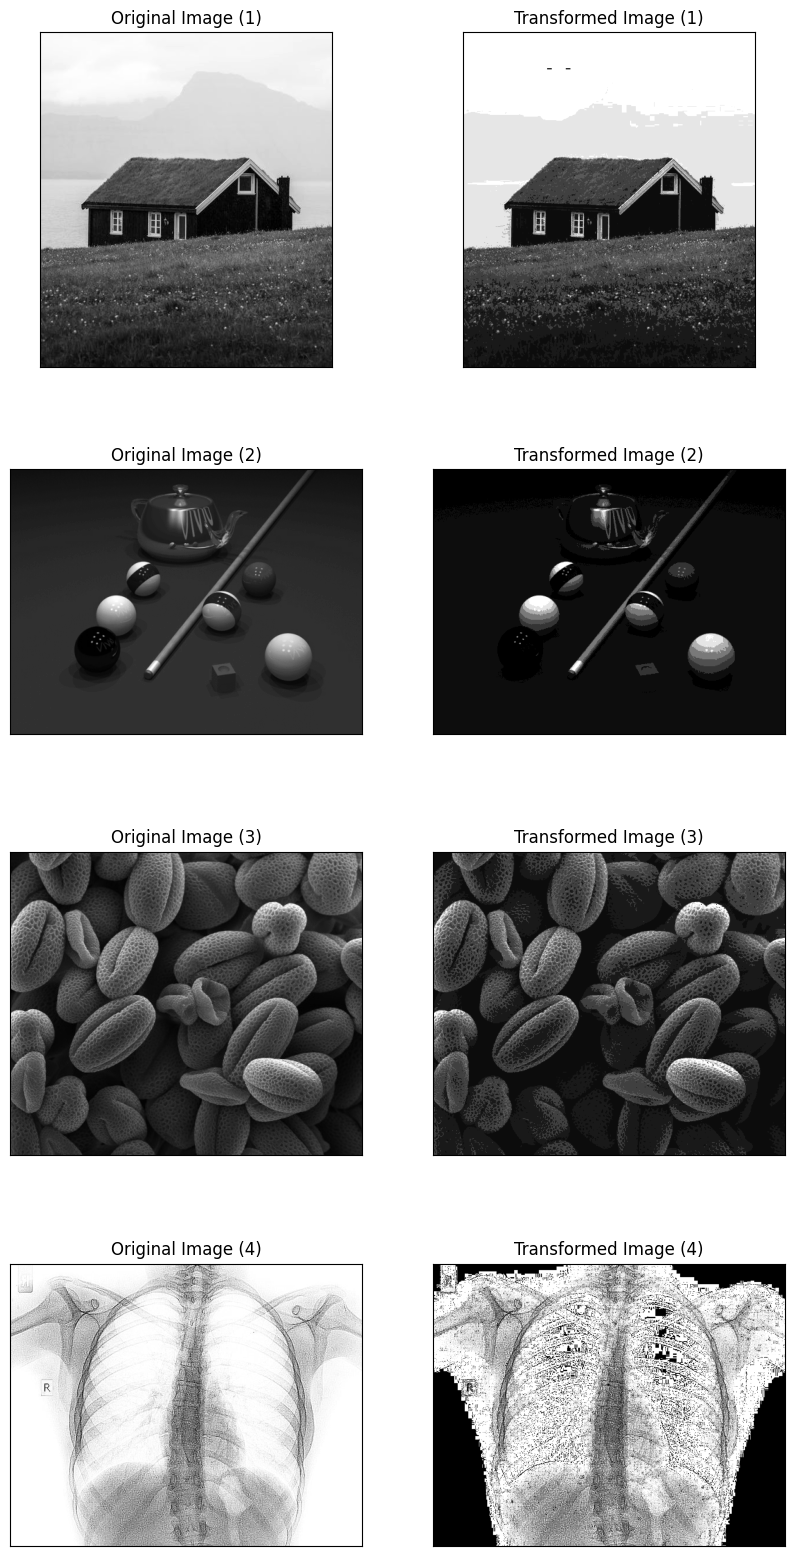

In [4]:
# plot results
plt.figure(figsize=[10,20])
plt.subplot(421); plt.imshow(img_1, cmap='gray')
plt.title('Original Image (1)'), plt.xticks([]), plt.yticks([])
plt.subplot(422); plt.imshow(tf_img_1, cmap='gray')
plt.title('Transformed Image (1)'), plt.xticks([]), plt.yticks([])
plt.subplot(423); plt.imshow(img_2, cmap='gray')
plt.title('Original Image (2)'), plt.xticks([]), plt.yticks([])
plt.subplot(424); plt.imshow(tf_img_2, cmap='gray')
plt.title('Transformed Image (2)'), plt.xticks([]), plt.yticks([])
plt.subplot(425); plt.imshow(img_3, cmap='gray')
plt.title('Original Image (3)'), plt.xticks([]), plt.yticks([])
plt.subplot(426); plt.imshow(tf_img_3, cmap='gray')
plt.title('Transformed Image (3)'), plt.xticks([]), plt.yticks([])
plt.subplot(427); plt.imshow(img_4, cmap='gray')
plt.title('Original Image (4)'), plt.xticks([]), plt.yticks([])
plt.subplot(428); plt.imshow(tf_img_4, cmap='gray')
plt.title('Transformed Image (4)'), plt.xticks([]), plt.yticks([])

We observe that the thresholding function had different effects on different images. On image (1), the function improved contrast by increasing the range of intensities between dark and light areas. On image (2), the function had a darker effect. On image (3), the function decreased contrast by reducing the range of intensities. Finally, on image (4) the function seemed to enhance small details more clearly.



# Enhancing an image in terms of the perceived light and color

**Gamma correction** is a technique used in image processing to adjust the brightness and contrast of an image by modifying the intensity values based on a power-law function. It compensates for the nonlinear relationship between pixel values and the displayed brightness on a monitor or screen. The gamma correction formula is given by:

<center>$O=I^γ$</center>

Where:

- $O$ represents the output intensity after gamma correction.
- $I$ is the input intensity value of the pixel.
- $γ$ is the gamma value, typically ranging from 0.1 to 5.0.

The gamma value controls the shape of the curve used for the correction. A gamma value less than 1 (<1) will brighten the image, while a value greater than 1 (>1) will darken it. This adjustment helps in achieving more accurate and visually appealing representations on display devices, especially when compensating for the nonlinear response of monitors to input pixel intensities.

In [5]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

<ipython-input-6-8d53c8cf448b>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141), plt.imshow(img), plt.axis('off'), plt.title('Original')
<ipython-input-6-8d53c8cf448b>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142), plt.imshow(adjusted), plt.axis('off'), plt.title('Gamma = 1.5')
<ipython-input-6-8d53c8cf448b>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143), plt.imshow(adjusted), plt.axis('off'), plt.title('Gamma = 2.5')


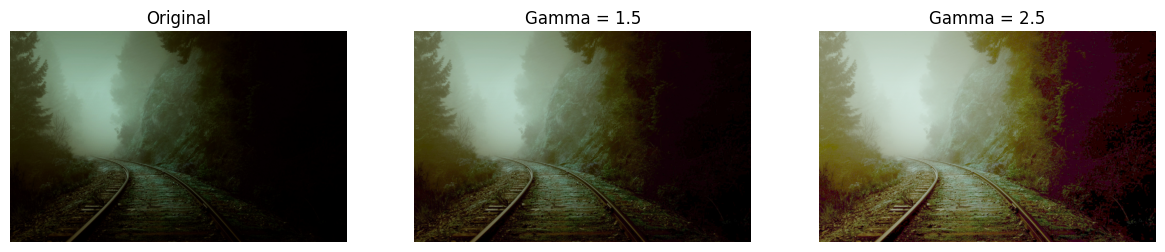

In [6]:
# read the image
img = cv2.imread('./img/nature_dark_forest.jpg', cv2.IMREAD_COLOR)

fig, axes = plt.subplots(1, 3, figsize=(20,10))
plt.subplot(141), plt.imshow(img), plt.axis('off'), plt.title('Original')

gamma = 1.5
adjusted = adjust_gamma(img, gamma=gamma)
plt.subplot(142), plt.imshow(adjusted), plt.axis('off'), plt.title('Gamma = 1.5')

gamma = 2.5
adjusted = adjust_gamma(img, gamma=gamma)
plt.subplot(143), plt.imshow(adjusted), plt.axis('off'), plt.title('Gamma = 2.5')

plt.show()

# Enhancing an image in terms of the perceived brightness

**Histogram equalization** is a technique used in image processing to enhance the contrast of an image by redistributing pixel intensities. The process involves transforming the intensity values in an image such that the histogram of the output image becomes more uniform, leading to improved visual appearance and detail. Mathematically, for an input image with pixel intensities in the range [0, L-1], where L is the number of intensity levels, histogram equalization aims to create a new intensity value G(x, y) for each pixel (x, y) based on the cumulative distribution function (CDF) of the original pixel intensities. The transformation function is given by: <br>

<center>
$ G(x, y) = round\left(\frac{{CDF(I(x, y)) - CDF_{\text{min}}}}{{(M \times N) - CDF_{\text{min}}}} \times (L-1)\right)$ </center>

Where:
- $ I(x, y) $ represents the original pixel intensity at coordinates $ (x, y) $.
- $ CDF(I(x, y)) $ is the cumulative distribution function of pixel intensities.
- $ CDF_{\text{min}} $ is the minimum non-zero value in the CDF.
- $ M $ and $ N $ are the dimensions of the image.

In [7]:
# read the image
img = cv2.imread('./img/pollen-500x430px-96dpi.jpg', cv2.IMREAD_GRAYSCALE)

# get the histogram using numpy
hist, _ = np.histogram(img.flatten(),256,[0,256])

# get the cumulative distriubtion function from the histogram
cdf = hist.cumsum()

# normalize the cdf
cdf_normalized = cdf * hist.max()/ cdf.max()  # min is 0

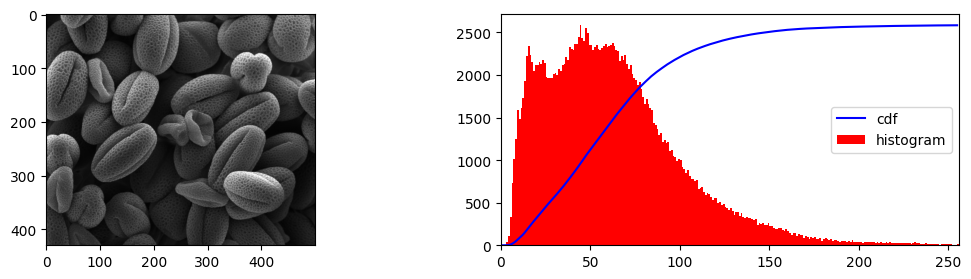

In [8]:
# plot the original image and its normalized cdf
fig, axes = plt.subplots(1, 2, figsize=(13,3))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'center right')
plt.show()

The histogram lies in the darker region. To convert it to the full spectrum, we need a transformation function which maps the input pixels in darker region to output pixels in full region.

In [9]:
# Apply Histogram Equalization (contrast enchancement)

# define a mask
cdf_m = np.ma.masked_equal(cdf,0)

# normalize
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

# The following line fills in the masked values of cdf_m with 0 to create a new
# array cdf2. The astype('uint8') method is used to convert the array to an
# unsigned 8-bit integer array, which can be used as an image.
cdf2 = np.ma.filled(cdf_m,0).astype('uint8')

# Apply the new histogram equalization to the original image by mapping
# each pixel to the news ones.
img2 = cdf2[img]

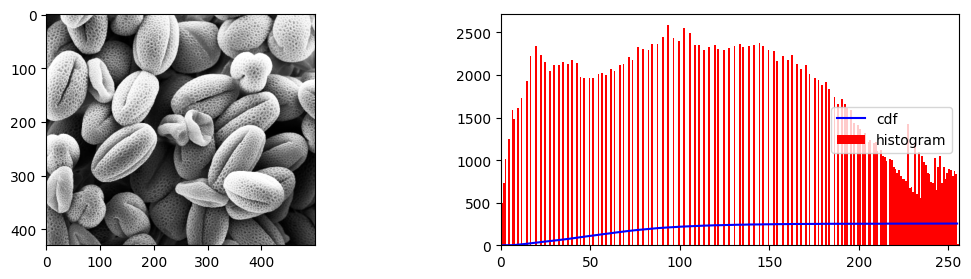

In [10]:
# plot results
fig, axes = plt.subplots(1, 2, figsize=(13,3))
plt.subplot(121), plt.imshow(img2, cmap='gray')
plt.subplot(122)
plt.plot(cdf2, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'center right')
plt.show()

# Sharpening an image

**Unsharp masking** is an image sharpening technique used to enhance edges and fine details by creating a sharpened version of an image. It involves subtracting a blurred (smoothed) version of the image from the original, emphasizing the edges and making them appear sharper. Mathematically, the unsharp masking process can be represented as:

<center><br>
$ g(x, y) = f(x, y) + c×(f(x, y) − b(x, y)) $
</center>

Where:

- $g(x, y)$ is the output image.
- $b(x, y)$ is the Blurred image, a smoothed version of the original image.
- $c$ represents the strength of the sharpening effect, often controlled by a scalar value.

This technique enhances edges by amplifying the differences between pixel intensities in the original and blurred images, resulting in a visually sharpened image.

**High boost filtering** is a technique used in image processing to enhance the sharpness of an image. It works by emphasizing the high-frequency components (edges or details) of an image while suppressing the low-frequency components (such as uniform regions or smooth areas).

The basic idea behind high boost filtering involves creating a mask or kernel that enhances the edges in an image. This is achieved by combining the original image with a high-pass filtered version of itself. The formula for high boost filtering is typically expressed as:

<center><br>
$ h(x, y) = Af(x, y) - l(x, y) $
</center>

Where:

- $h(x, y)$ is the output high boost image.
- $f(x, y)$ is the original image.
- $l(x, y)$ is a Low Pass Filtered image of the original image.
- $A$ is a constant value that determines the strength of the enhancement



The **Laplacian of Gaussian (LoG)** is another image processing technique used for edge detection and image sharpening. It's a two-step process that combines the Gaussian blur and the Laplacian operator.

1.**Gaussian Blur**:
- First, the image is convolved (mathematically combined) with a Gaussian kernel.
- The Gaussian kernel is a 2D matrix that emphasizes the center and decreases values as it moves away from the center, creating a blur effect.
- This step helps in smoothing or blurring the image and reducing noise.
- The equation for a 2D Gaussian function is:
<br><br>
<center>
$G(x, y) = \frac{1}{2πσ^2} × e^-\frac{x^2+y^2}{2σ^2}$
</center>
<br>
 where $G(x, y)$ represents the value of the Gaussian function at position $(x, y)$ in the kernel, and σ is the std determining the spread of the Gaussian.

To perform Gaussian smoothing on an image, the image is convolved with a Gaussian kernel, applying the above equation to each pixel. The resulting image is a smoothed or blurred version of the original.


2.**Laplacian Operator**:
- After blurring the image with the Gaussian filter, the Laplacian operator (often represented by a $3x3$ or $5x5$ kernel) is applied to the smoothed image.
- The Laplacian operator computes the second derivative of the image. It highlights regions where the intensity changes rapidly, which often corresponds to edges or boundaries in the image.
- This step enhances the edges and helps identify the locations of significant intensity variations.

The Laplacian operator, which computes the second derivative of an image, is oftren reepresented by a $3x3$ kernel. The discrete approximation of the Laplacian operator is:

<center> $Laplacian =
 \begin{pmatrix}
  0 & 1 & 0 \\
  1 & -4 & 1 \\
  0  & 1  & 1  \\
 \end{pmatrix}$
 </center>

The kernel above represents a basic form of the Laplacian operator. It's applied to the Gaussian-smoothed image to highlight areas with rapid intensity changes, typically corresponding to edges or boundaries in the image.
<br><br>
By combining these two steps, the Laplacian of Gaussian method effectively detects edges in an image by first reducing noise through Gaussian blurring and then highlighting edges using the Laplacian operator. The resulting image typically shows clearer edges and can be used for various applications in image processing, edge detection, and feature extraction.

Let's begin with **Unsharp Masking**:

In [11]:
def unsharp(alpha=0.2):
    A1 = np.array([[-1,1,-1],[1,1,1],[-1,1,-1]])
    A2 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
    return (alpha*A1+A2)/(alpha+1)

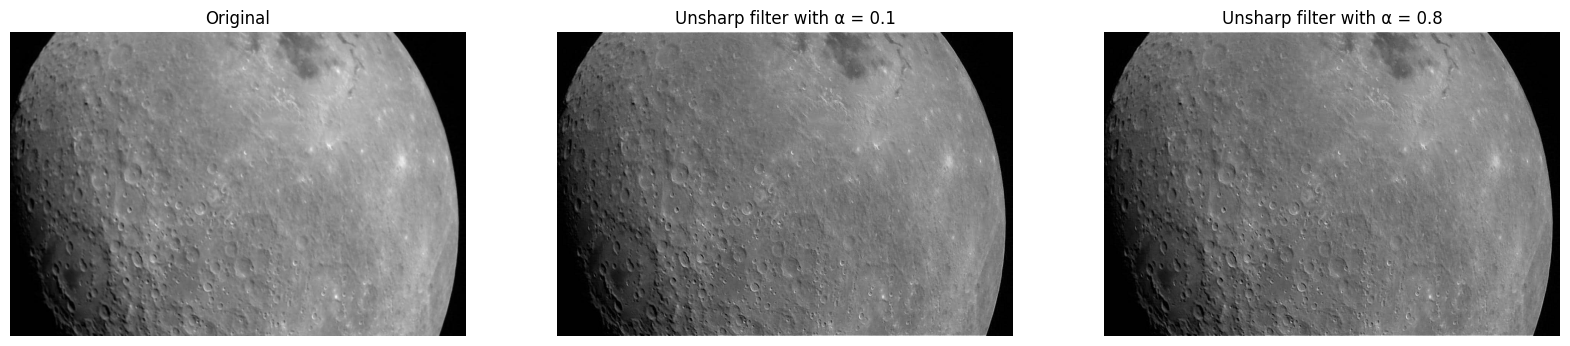

In [12]:
# read the image
img = cv2.imread('./img/First-photo-of-the-moon-from-Chandrayaan-2_ISRO.jpg', cv2.IMREAD_GRAYSCALE)

# Unsharp Masking

# plot
fig, axes = plt.subplots(1, 3, figsize=(20,10))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original'),
plt.axis('off')

kernel = unsharp(0.1)
tf_img_1 = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_CONSTANT)
plt.subplot(132), plt.imshow(tf_img_1, cmap='gray'), plt.title('Unsharp filter with α = 0.1'),
plt.axis('off')

kernel = unsharp(0.8)
tf_img_2 = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_CONSTANT)
plt.subplot(133), plt.imshow(tf_img_2, cmap='gray'), plt.title('Unsharp filter with α = 0.8'),
plt.axis('off')

plt.show()

**High Boost Filtering:**

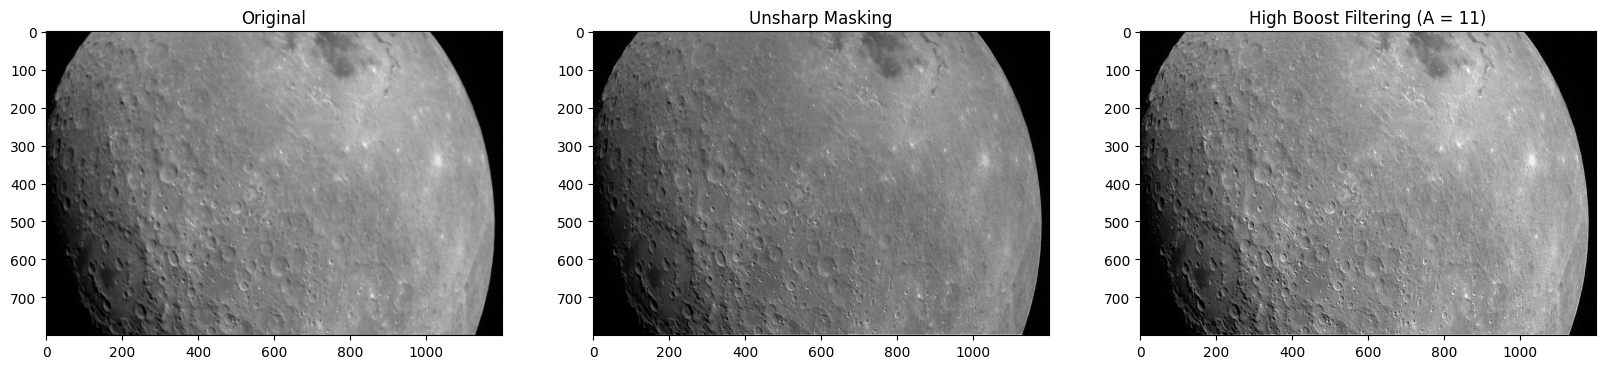

In [13]:
# High Boost Filtering

# ampliﬁcation factor
A = 19

# filter
kernel = -np.ones((3,3),np.float32)/9
kernel[1,1] = kernel[1,1]*(-A)

# apply the filter on the Unsharp Masking output
final_image = cv2.filter2D(tf_img_2, -1, kernel, borderType=cv2.BORDER_CONSTANT)

# plot results
fig, axes = plt.subplots(1, 3, figsize=(20,10))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original'),
plt.subplot(132), plt.imshow(tf_img_2, cmap='gray'), plt.title('Unsharp Masking'),
plt.subplot(133), plt.imshow(final_image, cmap='gray'), plt.title('High Boost Filtering (A = 11)'),
plt.show()

**Laplacian of Gaussian (LoG)**:

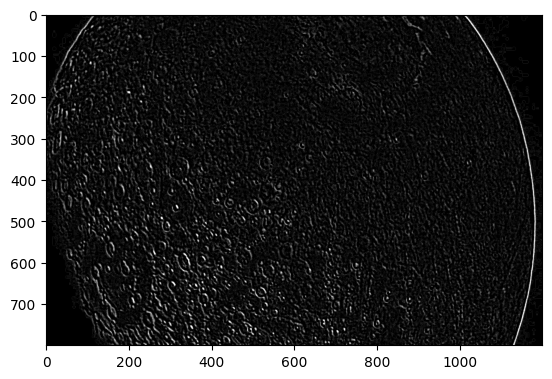

In [14]:
gaussian = cv2.GaussianBlur(img, [5,5], 15, 15)
laplacian = cv2.Laplacian(gaussian, ksize=3, ddepth=-1, borderType=cv2.BORDER_DEFAULT, scale=8 )
plt.imshow(laplacian, cmap='gray')


Text(0.5, 1.0, 'Laplacian')

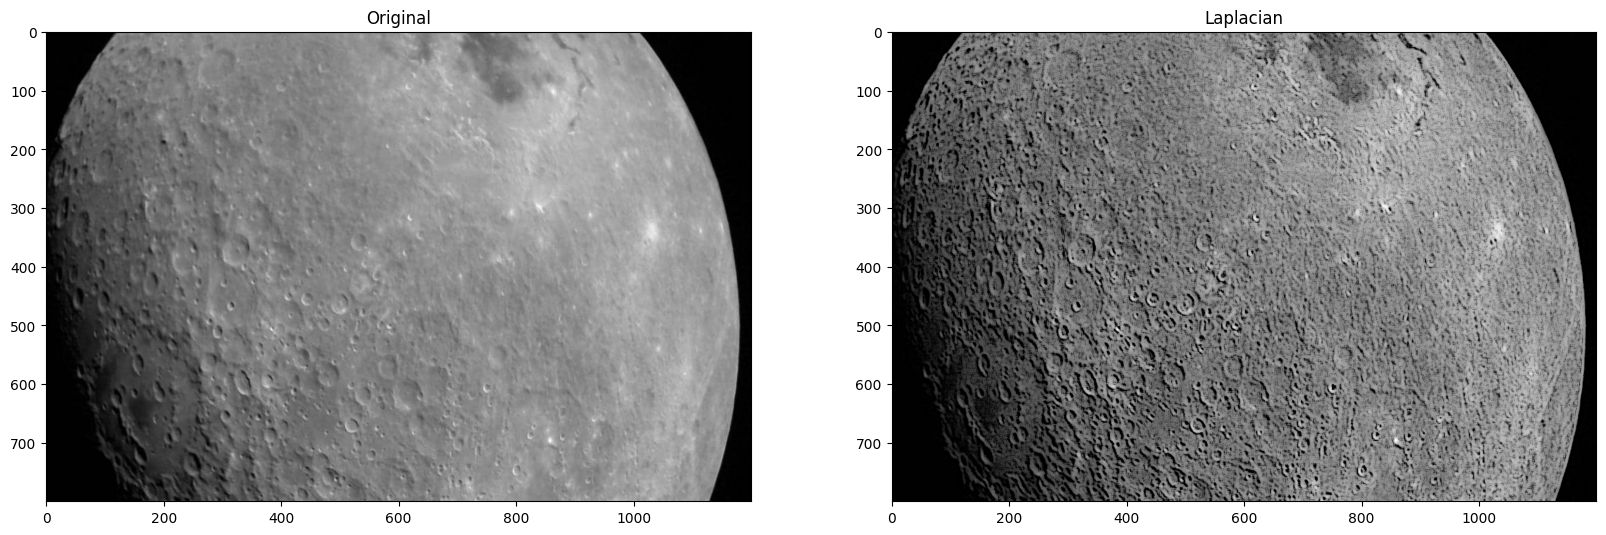

In [15]:
final = cv2.subtract(img, laplacian)

plt.figure(figsize=([20,10]))
plt.subplot(121); plt.imshow(img, cmap='gray'); plt.title('Original')
plt.subplot(122); plt.imshow(final, cmap='gray'); plt.title('Laplacian')

# Transforming a source to target image

Here we'll try to convert Image1 to Image2 by trying to approximate the processing steps that were adopted.

Text(0.5, 1.0, 'Image 2')

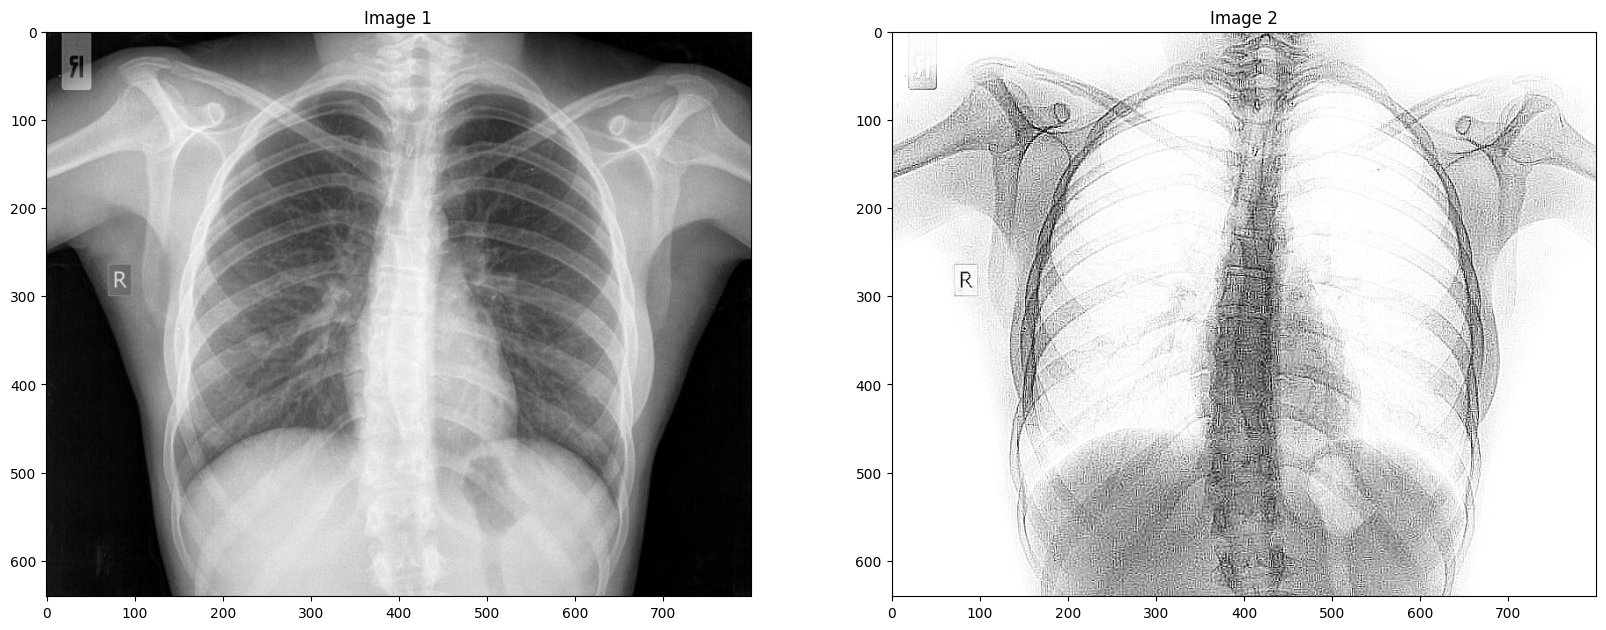

In [16]:
# read the image
img = cv2.imread('./img/image_1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./img/image_2.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=([20,10]))
plt.subplot(121); plt.imshow(img, cmap='gray'); plt.title('Image 1')
plt.subplot(122); plt.imshow(img2, cmap='gray'); plt.title('Image 2')

It seems that the processing steps used to enhance image_1 to image_2 could involve increasing the dynamic range and brightness, and possibly applying some form of spatial filtering or sharpening technique to enhance the details in the image.

To achieve this, the following processing steps could have been used:



1.   Increase the brightness and dynamic range of image_1 using a suitable gray level transformation method such as gamma correction or histogram equalization.
2.   Apply a spatial filter such as a high-pass filter or an unsharp masking filter to enhance the details in the image.
3.   Adjust the contrast and brightness of the image as necessary to match the desired output.






We'll apply the following processing steps:


1.   Digital negative to inverse the colours
2.   Histogram Equalization to balance contrast
3.   Addition to raise the brightness
4.   Unsharp Mask & High Boost Filtering to sharpen details



In [17]:
# calculate the digital negative of img
img_neg = 255 - img

# histogram equalization
# get the histogram using numpy
hist, bins = np.histogram(img_neg.flatten(),256,[0,256])
# get the cumulative distriubtion function from the histogram
cdf = hist.cumsum()
# normalize the cdf
cdf_normalized = cdf * hist.max()/ cdf.max()
# define a mask
cdf_m = np.ma.masked_equal(cdf,0)
# normalize
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf2 = np.ma.filled(cdf_m,0).astype('uint8')
# Apply the new histogram equalization to the original image by mapping
# each pixel to the news ones.
img_equalized = cdf2[img_neg]

# addition
matrix = np.ones(img.shape, dtype="uint8") * 115
img_brighter = cv2.add(img_equalized, matrix)

# Unsharp Mask and High Boost Filtering
kernel = unsharp(0.8)
tf_img_2 = cv2.filter2D(img_brighter, -1, kernel, borderType=cv2.BORDER_CONSTANT)

# High Boost Filtering
# ampliﬁcation factor
A = -17
# filter
kernel = -np.ones((3,3),np.float32)/9
kernel[1,1] = kernel[1,1]*(A)
# apply the filter on the Unsharp Masking output
final_image = cv2.filter2D(tf_img_2, -1, kernel, borderType=cv2.BORDER_CONSTANT)

Text(0.5, 1.0, 'Image 2')

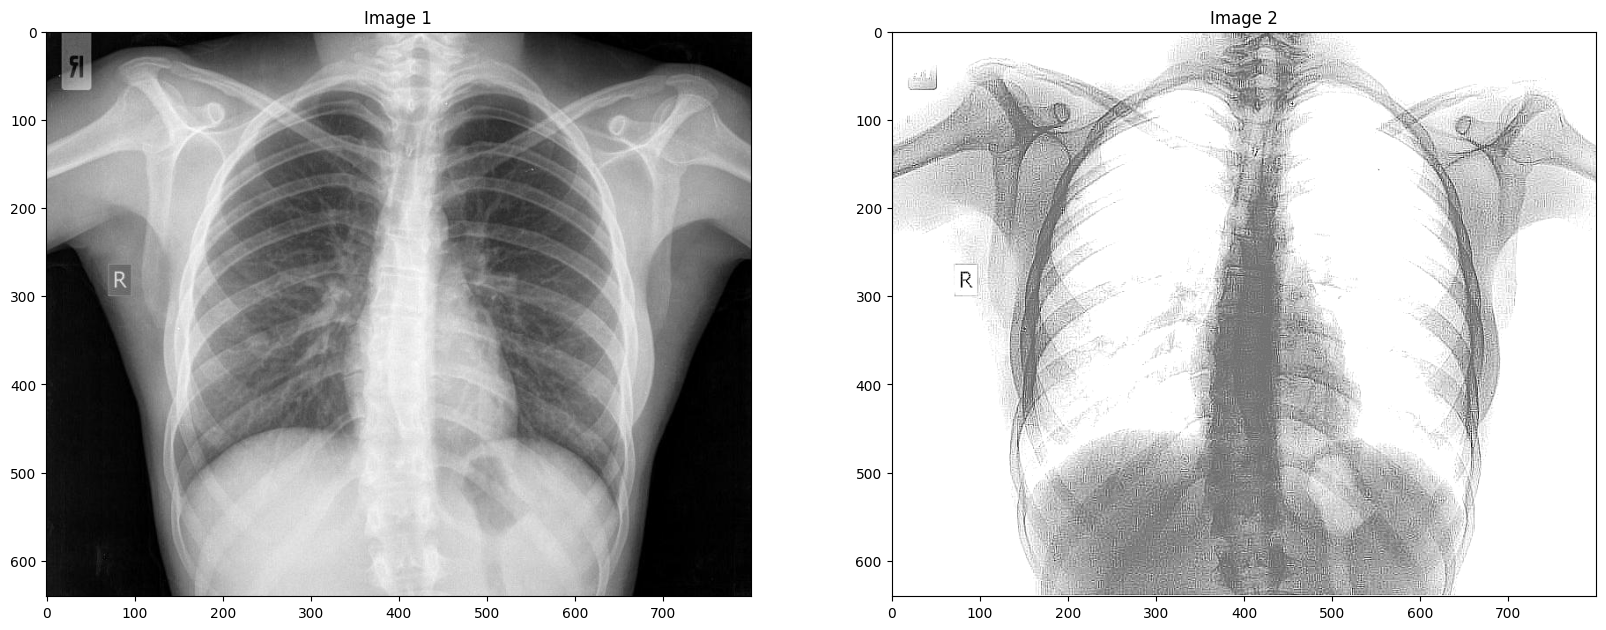

In [18]:
plt.figure(figsize=([20,10]))
plt.subplot(121); plt.imshow(img, cmap='gray'); plt.title('Image 1')
plt.subplot(122); plt.imshow(final_image, cmap='gray'); plt.title('Image 2')

For the reverse process, we propose the following processing pipeline:


1.   Gaussian filter to smooth Image_2
2.   Digital Negative to inverse the colors
3.   Histogram Equalization to balance contrast
4.   Gaussian filter to remove again any remaining noise
5.   Adjust Gamma to raise the brigthness

In [19]:
# Gaussian filter
img_gauss = cv2.GaussianBlur(img2, [3,3], 5, 5)

# Digital negative
img_neg_ = 255 - img_gauss

# histogram equalization
# get the histogram using numpy
hist, bins = np.histogram(img_neg_.flatten(),256,[0,256])
# get the cumulative distriubtion function from the histogram
cdf = hist.cumsum()
# normalize the cdf
cdf_normalized = cdf * hist.max()/ cdf.max()
# define a mask
cdf_m = np.ma.masked_equal(cdf,0)
# normalize
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf2 = np.ma.filled(cdf_m,0).astype('uint8')
# Apply the new histogram equalization to the original image by mapping
# each pixel to the news ones.
img_equalized = cdf2[img_neg_]

# Gaussian filter
img_gauss = cv2.GaussianBlur(img_equalized, [3, 3], 5, 5)

# Adjust Gamma
img_gamma = adjust_gamma(img_gauss, gamma=1.6)

Text(0.5, 1.0, 'Retrieved Image_1 from Image_2')

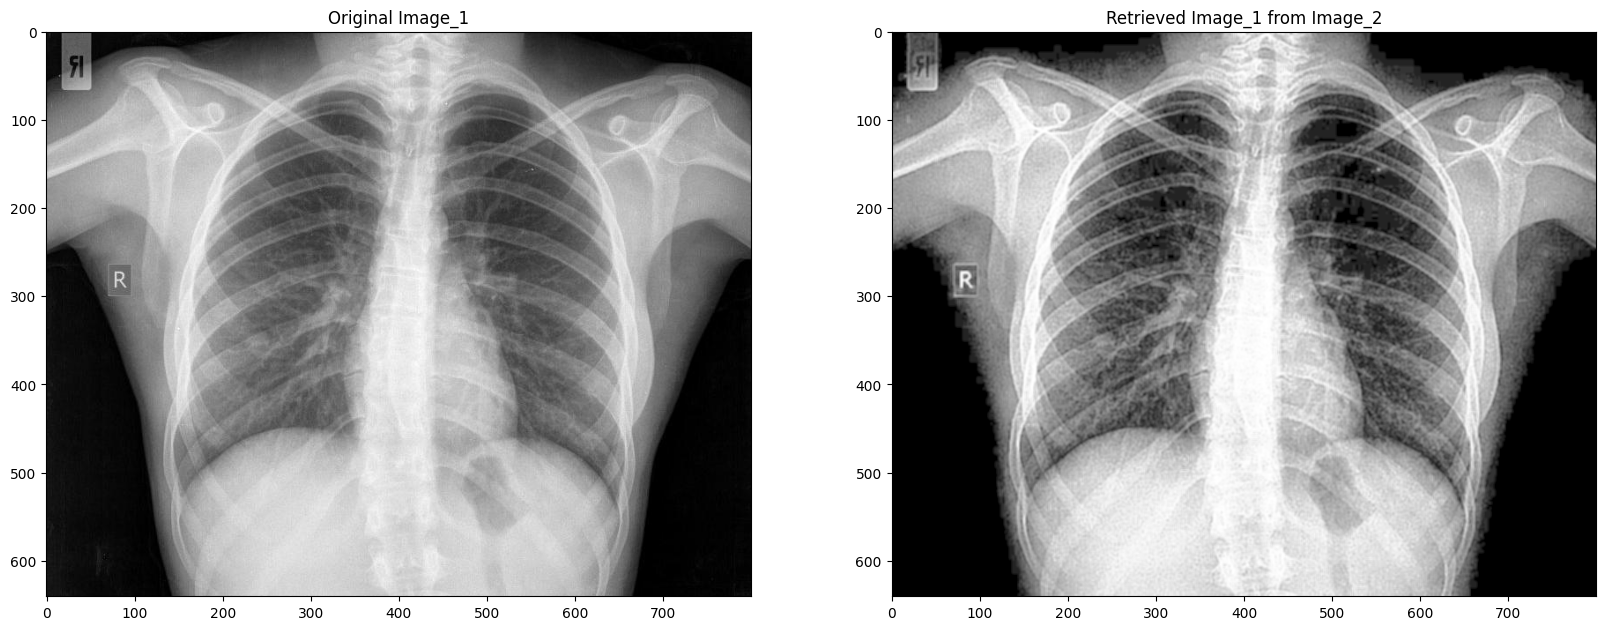

In [20]:
# plot results
plt.figure(figsize=([20,10]))
plt.subplot(121); plt.imshow(img, cmap='gray'); plt.title('Original Image_1')
plt.subplot(122); plt.imshow(img_gamma, cmap='gray'); plt.title('Retrieved Image_1 from Image_2')

# Finding edges, corners and locating objects



**Laplacian of Gaussian (LoG)** can also be used for edge detection.

In [21]:
# read the image
img = cv2.imread('./img/image11.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise (this will remove the grass)
blur = cv2.GaussianBlur(img, (7, 7), 0)

# Apply Canny Edge detection
img_tf = cv2.Canny(blur, 50, 150, L2gradient=False)

Text(0.5, 1.0, 'Retrieved Image_1 from Image_2')

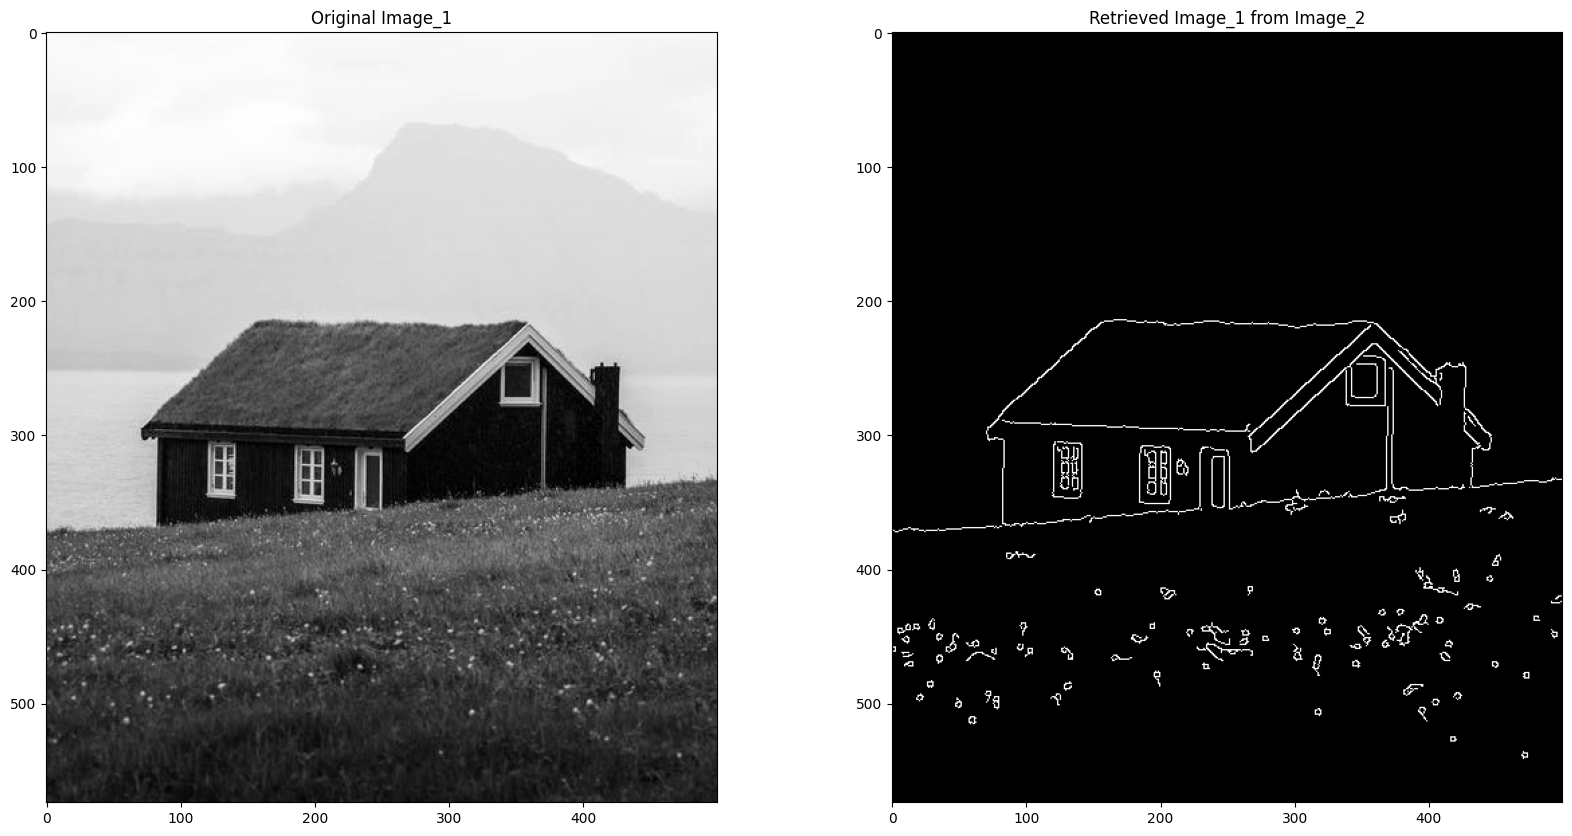

In [22]:
# plot results
plt.figure(figsize=([20,10]))
plt.subplot(121); plt.imshow(img, cmap='gray'); plt.title('Original Image_1')
plt.subplot(122); plt.imshow(img_tf, cmap='gray'); plt.title('Retrieved Image_1 from Image_2')

Now if we want to estimate the angle of the diagonal edges, for example the edges of the roof, one way is to use the **Hough Transform**. We'll use the following steps:

1.   Convert the image to grayscale.
2.   Apply edge detection algorithm (e.g. LoG, Canny) to extract the edges in the  image. We'll use Canny in order to get a binary image output. The reason is that cv2.HoughLines() function needs a binary image input.
3.   Apply the Hough Transform on the edge image to identify lines in the image. The Hough Transform represents lines as points in a parameter space.
4.   Identify the lines that correspond to the diagonal edges of the roof. This can be done by thresholding the Hough Transform output based on the angle of the lines. For example, you can select lines with an angle between 45 and 135 degrees.




---



**Hough Transform (Lines Detector)** is a technique used primarily for detecting shapes, particularly lines, circles, or other predefined geometric shapes, within an image. It's particularly useful for identifying shapes even if they're broken or incomplete and are distorted by noise. Hough Transform involves the representation of points in the image space $(x, y)$ as lines in the Hough space $(r, θ)$ using the line equation
<br>
<br>
<center>
$r = xcos(θ) + ysin(θ)$
</center>
<br>
Each point in the image space contributes votes to the accumulator array cells corresponding to potential lines in the Hough space. The process is computationally intensive but effective for detecting lines or other shapes in an image, making it a valuable tool in computer vision and image analysis.











---



The **Canny edge** detection algorithm is a multi-stage process used to detect a wide range of edges in an image while minimizing the detection of noise or false edges. It's highly effective due to its ability to identify edges with good localization, low error rate, and single response to true edges. Canny edge detection involves operations like Gaussian convolution, gradient calculations using differentiation operators, non-maximum suppression by preserving local maximum values, and thresholding to classify pixels as strong, weak, or non-edges based on gradient magnitudes. Here's it's mathematical pipeline:

1. Gaussian Smoothing:
<br><br>
<center>
$G(x, y) = \frac{1}{2πσ^2} × e^-\frac{x^2+y^2}{2σ^2}$
</center>
<br>
2. Gradient Calculation:
The gradient magnitude $M$ and direction $θ$ are calculated with:
<br><br>
<center>
$M = (G^2_x + G^2_y)^\frac{1}{2} $
<br>
<br>
$θ = arctan(\frac {G_y}{G_x})$
</center>
<br>
where $G_x$ and $G_y$ are the image gradients in the $x$ and $y$ directions, typically computed using Sobel or Prewitt operators.
3. Non-Maximum Suppression:
This step retains only the local maximum pixel values in the gradient direction. A comparison of gradient magnitude values is calculated in the direction of the gradient to preserve only local maxima.
4. Double Thresholding:
The double thresholding involves setting two thresholds, a high threshold $(T_high)$ and a low threshold $(T_low)$. Pixels with gradient magnitudes above $(T_high)$ are marked as strong edges, while pixels with gradient magnitudes below $T_low$ are considered non-edges, and finally pixels with values between the thresholds are classified as weak edges.
5. Edge Tracking by Hysteresis:
Weak edge pixels that are connected to strong edges are considered part of the edge. There's no specific equation here, but it involves traversing the image and linking weak edges to strong edges based on connectivity.

The result of the Canny Edge detector is a binary image highlighting the detected edges, providing precise localization and reducing false detections, making it widely used in various image processing and computer vision applications



In [23]:
def polar_to_cartesian(params):
    """
    Converts polar coordinates to Cartesian coordinates

    Parameters:

        params: two scalars, rho which is the distance of the line from the
                origin given in pixels and theta whihc is the angle formed by
                the normal to the line and the x-axis, given in radians.

    Returns:
        Cartesian coordinates a, b, x0 , y0.
    """
    rho, theta = params
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho

    return a, b, x0, y0


def define_line(coordinates):
    """
    Defines a line based on the Cartesian coordinates provided, by calculating
    the coordinates of two points of the line.

    Parameters:
        coordinates:    Cartesian coordinates a, b, x0, y0 that define a line
    """
    a, b, x0, y0 = coordinates
    # Define endpoints of the line
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    return x1, y1, x2, y2


def is_diagonal_line(theta_rad, tolerance=35):
    """
    Calculates weather the given line is diagonal.

    Parameters:
        theta_rad:  the angle of the line in radians w.r.t. x-axis
    """
    theta_degrees = np.rad2deg(theta_rad)
    if abs(theta_degrees) < tolerance or abs(theta_degrees - 180) < tolerance \
        or abs(theta_degrees - 90) < tolerance:
        return False
    else:
        return True

In [24]:
lines = cv2.HoughLines(img_tf, rho=1, theta=np.pi/160, threshold=70)
lines = lines.reshape(-1,2)

angles = []
for params in lines:
    theta_rad = params[1]
    a, b, x0, y0 = polar_to_cartesian(params)
    x1, y1, x2, y2 = define_line((a, b, x0, y0))

    # if the line is diagonal draw a line and
    # save it's angle (in degrees)
    if is_diagonal_line(theta_rad):
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 1)

        # the angle returned by cv2.HoughLines() is with respect to the vertical
        # axis (which by convention is the x axis.) To find the angle of each
        # line with respect to the horizontal axis (y axis) we only need to sub-
        # tract the vertical angle from 90 degrees. This is based on the fact that
        # the sum of the angles in a right triangle is always 90 degrees and since the
        # line defines an angle of k degrees with the vertical axis, the angle
        # it defines with the horizontal axis must be 90 - k degrees.
        theta_degrees = np.rad2deg(theta_rad)
        angle_horiz_axis = 90 - theta_degrees
        angles.append(angle_horiz_axis)

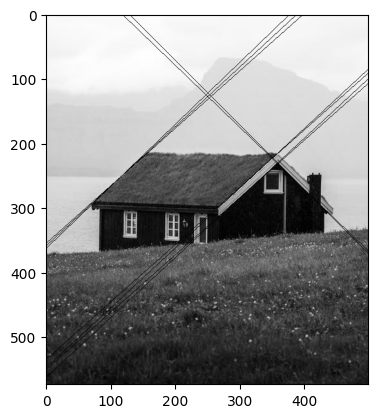

Angles in degrees:
[42.75, -45.0, 42.75, 41.625, 41.625, 43.875, 41.625, -43.875, 42.75]


In [25]:
# Display output image with detected lines
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

print('Angles in degrees:')
print(angles)

Now in order to find the corners we'll use the Harris Corner Detector.

The **Harris Corner Detector** is an algorithm used for identifying corner points or interest points in an image. It's particularly robust to lighting changes and variations in image orientation, making it valuable in image processing, feature extraction, and computer vision tasks.

The key steps involved in the Harris Corner Detector algorithm are as follows:

1. Intensity Gradient Calculation:
First you compute the gradients in both the $x$ and $y$ directions using, for example, Sobel or Prewitt operators. Then, you calculate the gradient products $I^2_x$, $I^2_y$, and $I_{xy}$.
2. Summation of Products of Gradients:
First you apply a Gaussian window to these gradients products to weigh their contributions in a local neighborhood and then you calculate the sums of products of gradients for each pixel using a Gaussian-weighted window.
3. Corner Response Function:
For each pixel, compute the corner response function using the formula:
<br>
<br>
<center>
$R = Det(M) - kTrace^2(M)$
<br>
<br>
</center>
Where $Det(M)$ is the determinant of the structure tensor $M$, $Trace^2(M)$ is the squared trace of $M$ and $k$ is an empirical constant usually set between 0.04 to 0.06. It helps differenetiate between corners and edges.
4. Corner Localization: Detect potential corner by selecting pixels where $R$ exceeds a certain threshold and then apply non-maximum suppression to ensure that nearby pixels with similar responses are not all considered as corners.


<ipython-input-26-11b31e02a3b0>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121),plt.imshow(img, cmap = 'gray')
<ipython-input-26-11b31e02a3b0>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(122),plt.imshow(img)


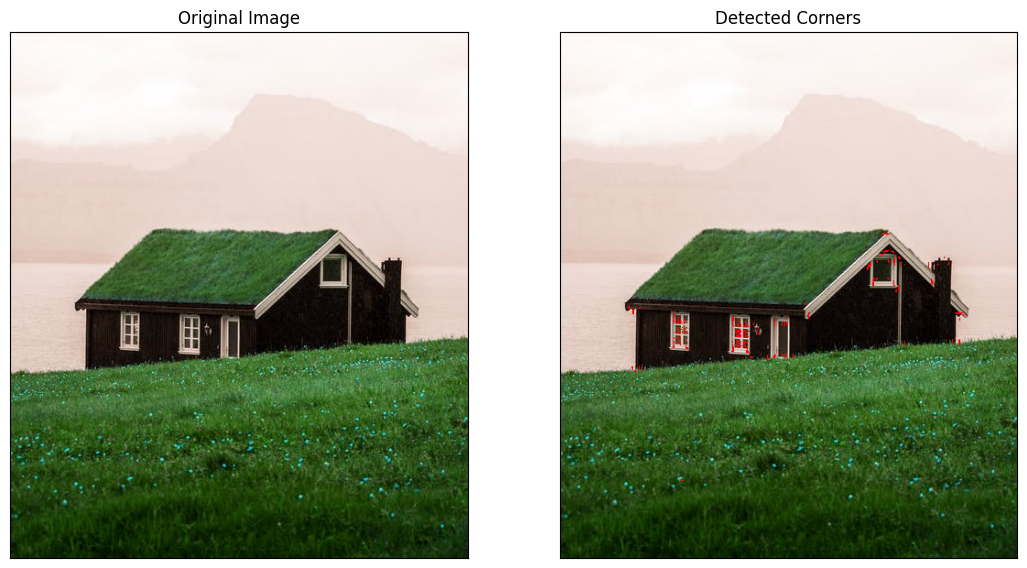

In [26]:
img = cv2.imread('./img/image11.jpg', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
gray =cv2.GaussianBlur(gray, [7,7], 13, 13)
corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

fig, axes = plt.subplots(1, 3, figsize=(13,7))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# Threshold for an optimal value, it may vary depending on the image.
img[corners>0.01*corners.max()]=[255,0,0]

plt.subplot(122),plt.imshow(img)
plt.title('Detected Corners'), plt.xticks([]), plt.yticks([])

plt.show()

In order to detect the windows we'll use a combination of thresholding, segmentation, and region filtering techniques:

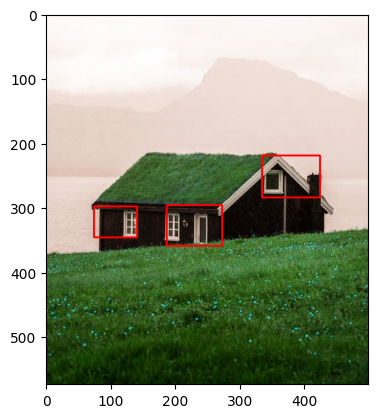

In [27]:
img = cv2.imread('./img/image11.jpg', cv2.IMREAD_COLOR)

# Apply a binary threshold to the corner response image
thresh = cv2.threshold(corners, 0.01*corners.max(), 255, cv2.THRESH_BINARY)[1]

# Apply morphological operations to remove noise and fill gaps
kernel = np.ones((45,45), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
thresh = cv2.convertScaleAbs(thresh)

# Find the contours of the corner regions
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter the contours based on size and shape to select the windows
windows = []
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = w/h
    area = cv2.contourArea(cnt)
    if aspect_ratio > 0.5 and aspect_ratio < 2 and area > 100 and area < 10000:
        windows.append((x, y, w, h))

# Draw bounding boxes around the windows
for x, y, w, h in windows:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the result
plt.imshow(img)

# Estimating angles and isolating objects

We'll use the Hough line detector to "fit" a line along the billiard cue to calculate its angle w.r.t. horizontal axis:

The angle of the cue with respect to the horizontal axis is -51.01325150448487 degrees.


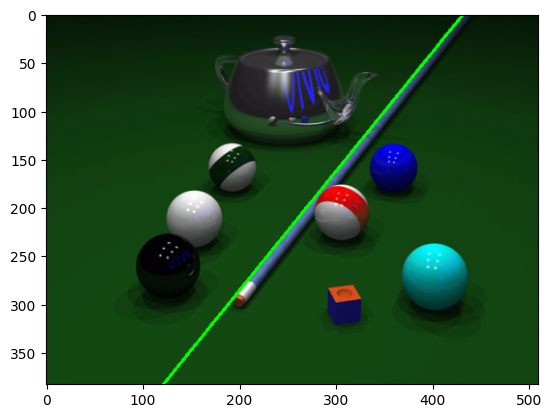

In [28]:
img = cv2.imread('./img/image31.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Apply Hough line transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# Keep only the longest line
max_len = 0
for line in lines:
    for rho, theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        length = math.sqrt((x2-x1)**2 + (y2-y1)**2)
        if length > max_len:
            max_len = length
            cue_line = (x1, y1, x2, y2)
            theta_degrees = np.rad2deg(theta)

# Draw the cue line on the original image
cv2.line(img, (cue_line[0], cue_line[1]), (cue_line[2], cue_line[3]), (0, 255, 0), 2)

# Calculate the angle of the cue line with respect to the horizontal axis
angle = math.atan2(cue_line[3]-cue_line[1], cue_line[2]-cue_line[0]) * 180 / np.pi

# Display the result
plt.imshow(img)
print(f"The angle of the cue with respect to the horizontal axis is {angle} degrees.")

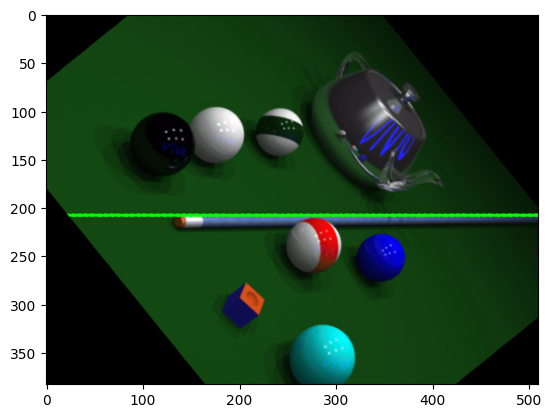

In [29]:
height, width = img.shape[:2]

# Calculate the rotation matrix
M = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)

# Apply the rotation to the image
rotated = cv2.warpAffine(img, M, (width, height))

plt.imshow(rotated, cmap='gray')

Now that we've found the line passing through the cue and we have verified it's angle, we will use a mask in order to isolate the cue, and then, we'll use an edge detector in order to surround it's shape. Then, we'll use another mask in order to isolate the surrounded object.

Text(0.5, 1.0, 'Cue')

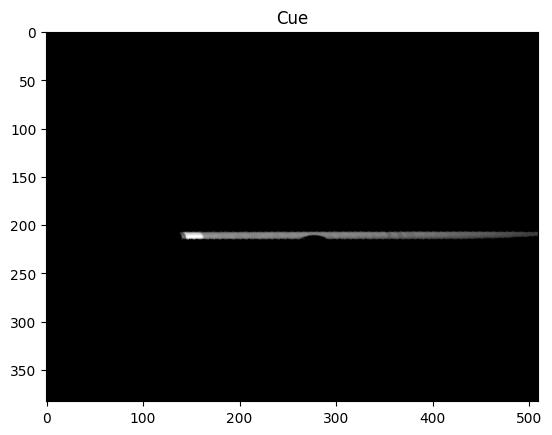

In [30]:
img = cv2.imread('./img/image31.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calculate the slope and intercept of the line
slope = (cue_line[3] - cue_line[1]) / (cue_line[2] - cue_line[0])
intercept = cue_line[1] - slope * cue_line[0]

x1 = cue_line[0]
y1 = cue_line[1]
x2 = cue_line[2]
y2 = cue_line[3]

# Create a mask to isolate the cue
mask = np.zeros_like(gray)
for y in range(mask.shape[0]):
    for x in range(mask.shape[1]):
        if y > slope * x + intercept -15 and y < slope * x + intercept + 11:
            mask[y, x] = 255

# Apply the mask to the original image
cue = cv2.bitwise_and(img, img, mask=mask)
cue = cv2.cvtColor(cue, cv2.COLOR_BGR2GRAY)

# Threshold
threshold_value = 55
max_value = 255
binary_img = cv2.threshold(cue, threshold_value, max_value, cv2.THRESH_BINARY)[1]

# Use the bitwise_and function to keep only the white pixels
result = cv2.bitwise_and(gray, binary_img)

# Apply the rotation to the image
rotated = cv2.warpAffine(result, M, (width, height))

# Display the result
plt.imshow(rotated, cmap='gray'); plt.title('Cue')